In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img=cv2.imread('images/Cars0.png')


In [3]:
def displayImg(img,*args):
    plt.imshow(img,*args)
    plt.show()

In [17]:
def displayGrayImg(img):
    plt.imshow(img,cmap='gray')
    plt.show()

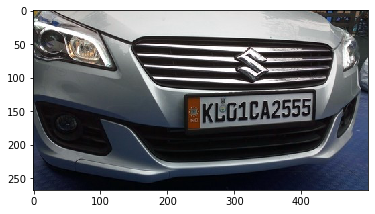

In [4]:
displayImg(img)

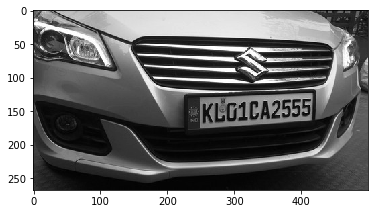

In [5]:
# single channel
# convert to gray image
grayImg=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(grayImg,cmap='gray')
plt.show()

# compute  H
求解一阶导

$$
H=\begin{bmatrix}
I_{x}I_{x}  &I_{x} I_{y}  \\ 
I_{x}I_{y}  & I_{y}I_{y}
\end{bmatrix} 
$$

In [6]:
# grayImg=np.random.random([3,4])
rows=grayImg.shape[0]
cols=grayImg.shape[1]
# print(grayImg)

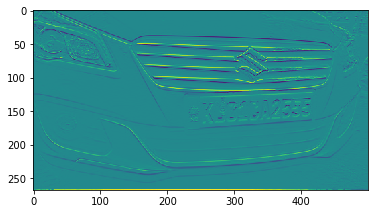

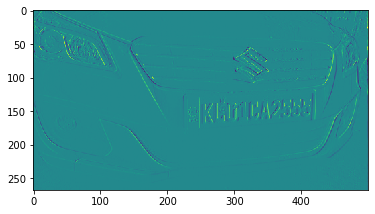

In [7]:

img_r_1=np.zeros(grayImg.shape)
img_r_1[:-1,:]=grayImg[1:,:]
img_r_1[-1,:]=grayImg[0,:]
# print(img_r_1)
Ix=img_r_1-grayImg
displayImg(Ix)

img_c_1=np.zeros(grayImg.shape)
img_c_1[:,:-1]=grayImg[:,1:]
img_c_1[:,-1]=grayImg[:,0]
# print(img_c_1)
Iy=img_c_1-grayImg
displayImg(Iy)

In [8]:
# grayImg=np.random.random([3,4])
H=np.zeros([grayImg.shape[0],grayImg.shape[1],2,2])
# Ixx
H[:,:,0,0]=Ix**2
H[:,:,0,1]=np.multiply(Ix,Iy)
H[:,:,1,0]=H[:,:,0,1]
H[:,:,1,1]=Iy**2


## compute M and R
 
$$R=det(M)-k*Trace(M)  , k= 0.04 \sim 0.06$$

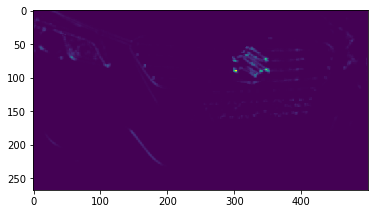

In [16]:
i=2
k=0.04
# M=np.zeros([grayImg.shape[0],grayImg.shape[1],2,2])
R=np.zeros(grayImg.shape)
for row in range(rows):
    for col in range(cols):

        # template
        # i=2
        # center=grayImg[row][col]
        try:
            template=grayImg[row-i:row+i+1,col-i:col+i+1]
            Hs=H[row-i:row+i+1,col-i:col+i+1]
            M=np.sum(np.multiply(template.reshape(5,5,1,1),Hs[:,:,]),axis=(0,1))
            R[row,col]=np.linalg.det(M)-k*np.trace(M)
        except:
            pass
# displayImg(R)

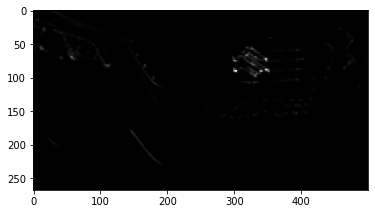

In [18]:
displayGrayImg(R)

In [25]:
def Harris(img,i=2,k=0.04):
    R=np.zeros(grayImg.shape)
    size=2*i+1
    for row in range(rows):
        for col in range(cols):
            try:
                template=grayImg[row-i:row+i+1,col-i:col+i+1]
                Hs=H[row-i:row+i+1,col-i:col+i+1]
                M=np.sum(np.multiply(template.reshape(size,size,1,1),Hs[:,:,]),axis=(0,1))
                R[row,col]=np.linalg.det(M)-k*np.trace(M)
            except:
                pass
    return R

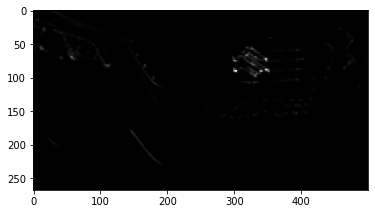

In [21]:
R=Harris(grayImg)
displayGrayImg(R)


In [32]:
Rs=[]
for i in range(4):
    R=Harris(grayImg,i=i+1)
    Rs.append(R)

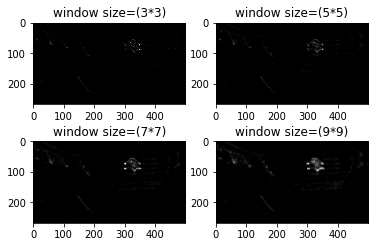

In [33]:
fig=plt.figure()
i=1
for R in Rs:
    plt.subplot(2,2,i)
    plt.imshow(R,cmap='gray')
    plt.title('window size=({0}*{0})'.format(2*i+1))
    i+=1
plt.show()
